import

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization


import data

In [32]:
train_data = pd.read_csv('dataset/data_real/Training_ID.csv')
test_datas = pd.read_csv('dataset/data_real/Testing_ID.csv')


drop col Disease_ID, Disease di test data

In [33]:

test_data = test_datas.drop(columns=['Disease_ID', 'Disease'])


tampilkan data

In [34]:
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease_ID,Disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,101,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,101,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,101,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,101,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,101,Fungal Infection


In [35]:
test_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_data.info(max_cols=139)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         211 non-null    int64 
 1    skin_rash                       211 non-null    int64 
 2    nodal_skin_eruptions            211 non-null    int64 
 3    continuous_sneezing             211 non-null    int64 
 4    shivering                       211 non-null    int64 
 5    chills                          211 non-null    int64 
 6    joint_pain                      211 non-null    int64 
 7    stomach_pain                    211 non-null    int64 
 8    acidity                         211 non-null    int64 
 9    ulcers_on_tongue                211 non-null    int64 
 10   muscle_wasting                  211 non-null    int64 
 11   vomiting                        211 non-null    int64 
 12   burning_micturition             21

persiapkan data, label encoding, split data

In [37]:
train_data['Combined_Label'] = train_data['Disease'] + '_' + train_data['Disease_ID'].astype(str)

# Pisahkan fitur dan label gabungan
X = train_data.drop(columns=['Disease', 'Disease_ID', 'Combined_Label'])
y = train_data['Combined_Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Pastikan ini menghasilkan array 2D, bentuk (jumlah_samples, jumlah_fitur)

# Langkah 3: Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y_encoded, test_size=0.2, random_state=32)

label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))


bangun model

In [38]:
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # input_shape = (jumlah fitur,)
    layers.Dropout(0.5),  # Dropout untuk regularisasi
    layers.Dense(64, activation='relu'),  # Hidden layer pertama
    layers.Dropout(0.1),  # Dropout untuk regularisasi
    layers.Dense(64, activation='relu'),  # Hidden layer kedua
    layers.Dense(32, activation='relu'),  # Hidden layer kedua
    layers.Dense(len(np.unique(y)), activation='softmax')  # Output units sesuai dengan jumlah kelas
])


In [39]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               17024     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 29)               

traning model, epochs 50, batch size 16

In [40]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Langkah 5: Melatih model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping], batch_size=16)

# Evaluasi model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {test_acc}')


Epoch 1/50
11/11 [==============================] - 1s 19ms/step - loss: 3.3564 - accuracy: 0.0417 - val_loss: 3.2508 - val_accuracy: 0.0930
Epoch 2/50
11/11 [==============================] - 0s 6ms/step - loss: 3.0866 - accuracy: 0.1726 - val_loss: 3.0610 - val_accuracy: 0.1860
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 2.8170 - accuracy: 0.2738 - val_loss: 2.8182 - val_accuracy: 0.3023
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 2.5706 - accuracy: 0.2917 - val_loss: 2.4971 - val_accuracy: 0.5116
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 2.2012 - accuracy: 0.4583 - val_loss: 2.1506 - val_accuracy: 0.6279
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 1.8794 - accuracy: 0.5179 - val_loss: 1.7793 - val_accuracy: 0.7209
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 1.5226 - accuracy: 0.6250 - val_loss: 1.4108 - val_accuracy: 0.8140
Epoch 8/50
11/11 [=

visualisasi hasil training model

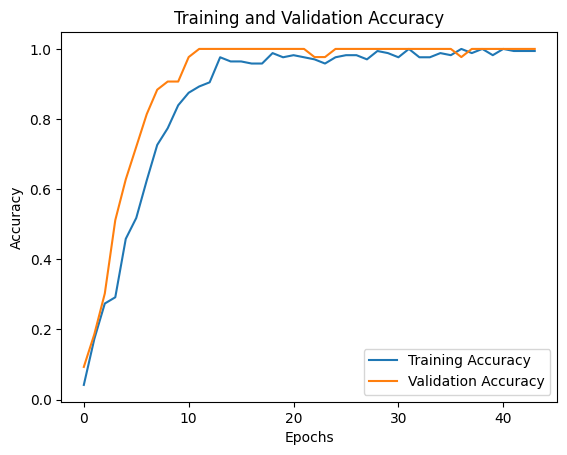

In [41]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


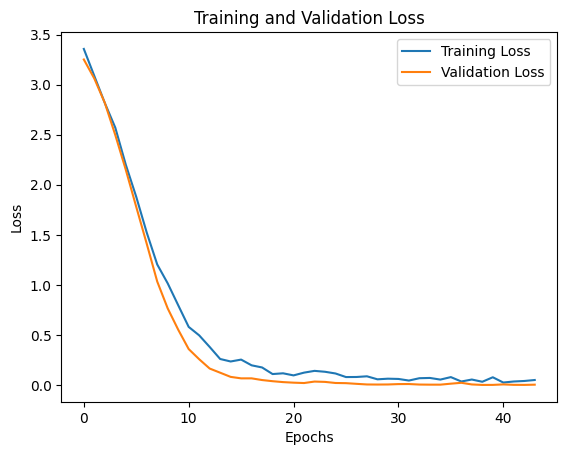

In [42]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


prediksi data test

In [43]:
# Melakukan prediksi dengan model
predictions = model.predict(test_data)  # Sesuaikan dengan data uji

# Mendapatkan indeks kelas dan probabilitas tertinggi untuk setiap prediksi
predicted_classes = np.argmax(predictions, axis=1)
predicted_probabilities = np.max(predictions, axis=1) * 100  # Skala 0-100

# Mendekode indeks kelas ke nama penyakit
predicted_labels = [label_mapping[pred] for pred in predicted_classes]

# Memisahkan nama penyakit dan ID
results = []
for i, (label, probability) in enumerate(zip(predicted_labels, predicted_probabilities)):
    disease, disease_id = label.split('_')  # Pisahkan penyakit dan ID
    result = {"Disease_ID": disease_id, "penyakit": disease, "probabilitas": probability}
    results.append(result)
    print(result)


1/1 [==============================] - 0s 71ms/step
{'Disease_ID': '101', 'penyakit': 'Fungal Infection', 'probabilitas': 54.255802}
{'Disease_ID': '103', 'penyakit': 'Gerd', 'probabilitas': 45.562763}
{'Disease_ID': '104', 'penyakit': 'Chronic Cholestasis', 'probabilitas': 82.643524}
{'Disease_ID': '106', 'penyakit': 'Peptic Ulcer Diseae', 'probabilitas': 53.363853}
{'Disease_ID': '108', 'penyakit': 'Diabetes', 'probabilitas': 61.68912}
{'Disease_ID': '109', 'penyakit': 'Gastroenteritis', 'probabilitas': 34.412807}
{'Disease_ID': '110', 'penyakit': 'Bronchial Asthma', 'probabilitas': 58.97001}
{'Disease_ID': '111', 'penyakit': 'Hypertension', 'probabilitas': 62.980713}
{'Disease_ID': '112', 'penyakit': 'Migraine', 'probabilitas': 86.29844}
{'Disease_ID': '113', 'penyakit': 'Cervical Spondylosis', 'probabilitas': 58.8336}
{'Disease_ID': '114', 'penyakit': 'Paralysis (Brain Hemorrhage)', 'probabilitas': 58.061306}
{'Disease_ID': '116', 'penyakit': 'Malaria', 'probabilitas': 82.60683}
{'

In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Melakukan prediksi dengan model
test_labels = test_datas['Disease']
predictions = model.predict(test_data)  # Sesuaikan dengan data uji

# Mendapatkan indeks kelas dan probabilitas tertinggi untuk setiap prediksi
predicted_classes = np.argmax(predictions, axis=1)
predicted_probabilities = np.max(predictions, axis=1) * 100  # Skala 0-100

# Mendekode indeks kelas ke nama penyakit
predicted_labels = [label_mapping[pred] for pred in predicted_classes]

# Tabel hasil prediksi
results = []
for i, (true_label, pred_label, probability) in enumerate(zip(test_labels, predicted_labels, predicted_probabilities)):
    # Memisahkan nama penyakit dan ID jika formatnya menggunakan underscore
    disease, disease_id = pred_label.split('_') if '_' in pred_label else (pred_label, "N/A")
    
    # Menentukan apakah prediksi benar atau salah
    true_or_false = true_label == pred_label
    
    # Membuat entry hasil
    result = {
        "klasifikasi_testing": true_label,
        "hasil_prediksi": disease,
        "probabilitas (%)": probability,
    }
    results.append(result)

# Mengonversi ke DataFrame untuk visualisasi tabel
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil
results_df


1/1 [==============================] - 0s 19ms/step


,klasifikasi_testing,hasil_prediksi,probabilitas (%)
0,Fungal Infection,Fungal Infection,54.255802
1,Gerd,Gerd,45.562763
2,Chronic Cholestasis,Chronic Cholestasis,82.643524
3,Peptic Ulcer Diseae,Peptic Ulcer Diseae,53.363853
4,Diabetes,Diabetes,61.689121
5,Gastroenteritis,Gastroenteritis,34.412807
6,Bronchial Asthma,Bronchial Asthma,58.970009
7,Hypertension,Hypertension,62.980713
8,Migraine,Migraine,86.298439
9,Cervical Spondylosis,Cervical Spondylosis,58.833599


In [49]:
print("Distribusi label di data uji:")
print(test_datas['Disease'].value_counts())
print("Distribusi label di prediksi:")
print(np.unique(predicted_labels, return_counts=True))


Distribusi label di data uji:
Disease
Fungal Infection                2
Hepatitis A                     1
Psoriasis                       1
Urinary Tract Infection         1
Acne                            1
Arthritis                       1
Osteoarthristis                 1
Hypoglycemia                    1
Hypothyroidism                  1
Heart Attack                    1
Dimorphic Hemmorhoids(Piles)    1
Pneumonia                       1
Common Cold                     1
Tuberculosis                    1
Typhoid                         1
Gerd                            1
Dengue                          1
Chicken Pox                     1
Malaria                         1
Paralysis (Brain Hemorrhage)    1
Cervical Spondylosis            1
Migraine                        1
Hypertension                    1
Bronchial Asthma                1
Gastroenteritis                 1
Diabetes                        1
Peptic Ulcer Diseae             1
Chronic Cholestasis             1
Impetigo  

In [48]:
# Pastikan label konsisten (semua string atau semua angka)
true_labels = test_datas['Disease'].astype(str)  # Konversi ke string jika tipe label campuran
predicted_labels = predicted_classes.astype(str)  # Konversi hasil prediksi ke string

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=np.unique(true_labels))
print("Confusion Matrix:")
print(cm)

# Komponen Confusion Matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Precision, Recall, Accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 

e:\code\AITF\cpuvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\code\AITF\cpuvenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.save("model_penyakit.h5")


e:\code\AITF\cpuvenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
import tensorflow as tf

# Memuat model yang diekspor
loaded_model = tf.keras.models.load_model("model_penyakit.h5")

# Melakukan prediksi dengan model yang dimuat
loaded_predictions = loaded_model.predict(test_data)  # Sesuaikan dengan data uji

# Mendapatkan indeks kelas dan probabilitas tertinggi untuk setiap prediksi
loaded_predicted_classes = np.argmax(loaded_predictions, axis=1)
loaded_predicted_probabilities = np.max(loaded_predictions, axis=1) * 100  # Skala 0-100


predicted_labels = [label_mapping[pred] for pred in predicted_classes]

# Memisahkan nama penyakit dan ID
results = []
for i, (label, probability) in enumerate(zip(predicted_labels, predicted_probabilities)):
    disease, disease_id = label.split('_')  # Pisahkan penyakit dan ID
    result = {"Disease_ID": disease_id, "penyakit": disease, "probabilitas": probability}
    results.append(result)
    print(result)


1/1 [==============================] - 0s 61ms/step
{'Disease_ID': '101', 'penyakit': 'Fungal Infection', 'probabilitas': 54.255802}
{'Disease_ID': '103', 'penyakit': 'Gerd', 'probabilitas': 45.562763}
{'Disease_ID': '104', 'penyakit': 'Chronic Cholestasis', 'probabilitas': 82.643524}
{'Disease_ID': '106', 'penyakit': 'Peptic Ulcer Diseae', 'probabilitas': 53.363853}
{'Disease_ID': '108', 'penyakit': 'Diabetes', 'probabilitas': 61.68912}
{'Disease_ID': '109', 'penyakit': 'Gastroenteritis', 'probabilitas': 34.412807}
{'Disease_ID': '110', 'penyakit': 'Bronchial Asthma', 'probabilitas': 58.97001}
{'Disease_ID': '111', 'penyakit': 'Hypertension', 'probabilitas': 62.980713}
{'Disease_ID': '112', 'penyakit': 'Migraine', 'probabilitas': 86.29844}
{'Disease_ID': '113', 'penyakit': 'Cervical Spondylosis', 'probabilitas': 58.8336}
{'Disease_ID': '114', 'penyakit': 'Paralysis (Brain Hemorrhage)', 'probabilitas': 58.061306}
{'Disease_ID': '116', 'penyakit': 'Malaria', 'probabilitas': 82.60683}
{'